In [305]:
import pandas as pd 
import numpy as np  

import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline 

In [ ]:
# data https://www.datosabiertos.gob.pe/dataset/fallecidos-hospitalizados-y-vacunados-por-covid-19

In [306]:
df = pd.read_csv('TB_FALLECIDO_HOSP_VAC.csv', sep = ';')

In [307]:
df.head()

,id_persona,fecha_fallecimiento,edad,sexo,criterio_fallecido,ubigeo_cdc,dpt_cdc,prov_cdc,dist_cdc,cdc_positividad,...,fabricante_dosis3,clasificacion_vacuna4,fecha_dosis4,fabricante_dosis4,clasificacion_vacuna5,fecha_dosis5,fabricante_dosis5,clasificacion_vacuna6,fecha_dosis6,fabricante_dosis6
0,4176017,21/01/2022,75,M,Criterio SINADEF,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23086642,26/04/2021,53,F,Criterio virológico,21806,ANCASH,SANTA,NEPEÑA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13178121,14/03/2021,52,F,Criterio virológico,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17662628,24/03/2021,52,F,Criterio virológico,150142,LIMA,LIMA,VILLA EL SALVADOR,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1309244,9/05/2021,76,F,Criterio virológico,150124,LIMA,LIMA,PUCUSANA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
df.dtypes

id_persona                        int64
fecha_fallecimiento              object
edad                              int64
sexo                             object
criterio_fallecido               object
ubigeo_cdc                        int64
dpt_cdc                          object
prov_cdc                         object
dist_cdc                         object
cdc_positividad                   int64
fecha_dosis1                    float64
fecha_dosis2                    float64
flag_hospitalizado                int64
eess_renaes                       int64
eess_diresa                      object
eess_red                         object
eess_nombre                      object
fecha_ingreso_hosp               object
flag_uci                          int64
fecha_ingreso_uci                object
fecha_ingreso_ucin               object
con_oxigeno                       int64
con_ventilacion                   int64
fecha_segumiento_hosp_ultimo     object
evolucion_hosp_ultimo            object


In [ ]:
cat_cols = df[['sexo','criterio_fallecido','ubigeo_cdc']]

In [244]:
df.columns

Index(['id_persona', 'fecha_fallecimiento', 'edad', 'sexo',
       'criterio_fallecido', 'ubigeo_cdc', 'dpt_cdc', 'prov_cdc', 'dist_cdc',
       'cdc_positividad', 'fecha_dosis1', 'fecha_dosis2', 'flag_hospitalizado',
       'eess_renaes', 'eess_diresa', 'eess_red', 'eess_nombre',
       'fecha_ingreso_hosp', 'flag_uci', 'fecha_ingreso_uci',
       'fecha_ingreso_ucin', 'con_oxigeno', 'con_ventilacion',
       'fecha_segumiento_hosp_ultimo', 'evolucion_hosp_ultimo',
       'ubigeo_inei_domicilio', 'dep_domicilio', 'prov_domicilio',
       'dist_domicilio', 'flag_vacuna', 'clasificacion_vacuna1',
       'fabricante_dosis1', 'clasificacion_vacuna2', 'fabricante_dosis2',
       'clasificacion_vacuna3', 'fecha_dosis3', 'fabricante_dosis3',
       'clasificacion_vacuna4', 'fecha_dosis4', 'fabricante_dosis4',
       'clasificacion_vacuna5', 'fecha_dosis5', 'fabricante_dosis5',
       'clasificacion_vacuna6', 'fecha_dosis6', 'fabricante_dosis6'],
      dtype='object')

In [245]:
df[['flag_uci']].isna().sum()

flag_uci    0
dtype: int64

In [246]:
df['fecha_dosis5'].unique()

array([nan])

In [247]:
df.describe()

,id_persona,edad,ubigeo_cdc,cdc_positividad,fecha_dosis1,fecha_dosis2,flag_hospitalizado,eess_renaes,flag_uci,con_oxigeno,...,fabricante_dosis3,clasificacion_vacuna4,fecha_dosis4,fabricante_dosis4,clasificacion_vacuna5,fecha_dosis5,fabricante_dosis5,clasificacion_vacuna6,fecha_dosis6,fabricante_dosis6
count,1.244280e+05,124428.000000,124428.000000,124428.000000,0.0,0.0,124428.000000,124428.000000,124428.000000,124428.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.761061e+07,66.403727,131987.664842,0.001816,NaN,NaN,0.188270,1177.938253,0.038938,0.171754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.399664e+07,16.066782,51903.854780,0.042580,NaN,NaN,0.390929,3657.632815,0.193448,0.377168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.200000e+01,0.000000,10101.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.218078e+06,57.000000,110102.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.362256e+07,68.000000,150108.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.621388e+07,78.000000,150137.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.200498e+07,113.000000,250401.000000,1.000000,NaN,NaN,1.000000,28025.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
print(f"No. of Null Values:-" ) 
df.isnull().sum() 

No. of Null Values:-


id_persona                           0
fecha_fallecimiento                  0
edad                                 0
sexo                                 0
criterio_fallecido                   0
ubigeo_cdc                           0
dpt_cdc                              0
prov_cdc                             0
dist_cdc                             0
cdc_positividad                      0
fecha_dosis1                    124428
fecha_dosis2                    124428
flag_hospitalizado                   0
eess_renaes                          0
eess_diresa                     101002
eess_red                        101002
eess_nombre                     101002
fecha_ingreso_hosp              101002
flag_uci                             0
fecha_ingreso_uci               120631
fecha_ingreso_ucin              122896
con_oxigeno                          0
con_ventilacion                      0
fecha_segumiento_hosp_ultimo    101002
evolucion_hosp_ultimo           101136
ubigeo_inei_domicilio    

In [249]:
df.drop(columns=df.loc[:,df.isnull().sum() == 124428].columns,axis=1, inplace= True)

In [250]:
df.drop(columns=['dpt_cdc','ubigeo_inei_domicilio','prov_cdc','dist_cdc','eess_diresa','eess_red','eess_nombre','dep_domicilio','prov_domicilio','dist_domicilio','flag_vacuna'],axis=1, inplace= True)

In [251]:
df.isnull().sum()

id_persona                           0
fecha_fallecimiento                  0
edad                                 0
sexo                                 0
criterio_fallecido                   0
ubigeo_cdc                           0
cdc_positividad                      0
flag_hospitalizado                   0
eess_renaes                          0
fecha_ingreso_hosp              101002
flag_uci                             0
fecha_ingreso_uci               120631
fecha_ingreso_ucin              122896
con_oxigeno                          0
con_ventilacion                      0
fecha_segumiento_hosp_ultimo    101002
evolucion_hosp_ultimo           101136
dtype: int64

In [252]:
df.dtypes

id_persona                       int64
fecha_fallecimiento             object
edad                             int64
sexo                            object
criterio_fallecido              object
ubigeo_cdc                       int64
cdc_positividad                  int64
flag_hospitalizado               int64
eess_renaes                      int64
fecha_ingreso_hosp              object
flag_uci                         int64
fecha_ingreso_uci               object
fecha_ingreso_ucin              object
con_oxigeno                      int64
con_ventilacion                  int64
fecha_segumiento_hosp_ultimo    object
evolucion_hosp_ultimo           object
dtype: object

In [253]:
df['criterio_fallecido'].unique()

array(['Criterio SINADEF', 'Criterio virológico', 'Criterio serológico',
       'Criterio investigación Epidemiológica',
       'Criterio nexo epidemiológico', 'Criterio radiológico',
       'Criterio clínico', 'NotiCovid', 'sinadef'], dtype=object)

In [254]:
~df['fecha_ingreso_hosp'].isna()

0          True
1         False
2         False
3         False
4         False
          ...  
124423    False
124424    False
124425    False
124426     True
124427     True
Name: fecha_ingreso_hosp, Length: 124428, dtype: bool

In [255]:
df.loc[~df['fecha_fallecimiento'].isna(), ['fecha_fallecimiento','criterio_fallecido','fecha_ingreso_uci','fecha_ingreso_ucin','fecha_ingreso_hosp','fecha_segumiento_hosp_ultimo','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,fecha_ingreso_uci,fecha_ingreso_ucin,fecha_ingreso_hosp,fecha_segumiento_hosp_ultimo,evolucion_hosp_ultimo
0,21/01/2022,Criterio SINADEF,NaN,NaN,20/01/2022,21/01/2022,defuncion
1,26/04/2021,Criterio virológico,NaN,NaN,NaN,NaN,NaN
2,14/03/2021,Criterio virológico,NaN,NaN,NaN,NaN,NaN
3,24/03/2021,Criterio virológico,NaN,NaN,NaN,NaN,NaN
4,9/05/2021,Criterio virológico,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
124423,1/03/2021,Criterio SINADEF,NaN,NaN,NaN,NaN,NaN
124424,2/06/2021,Criterio virológico,NaN,NaN,NaN,NaN,NaN
124425,19/02/2021,Criterio SINADEF,NaN,NaN,NaN,NaN,NaN
124426,21/06/2021,Criterio SINADEF,NaN,20/06/2021,20/06/2021,21/06/2021,defuncion


In [256]:
"""
fecha_fallecimiento
fecha_ingreso_uci
fecha_ingreso_ucin
fecha_ingreso_hosp
fecha_segumiento_hosp_ultimo

dias_hospitalizado
dias_seguimiento_hosp
dias_uci
dias_ucin


"""

'\nfecha_fallecimiento\nfecha_ingreso_uci\nfecha_ingreso_ucin\nfecha_ingreso_hosp\nfecha_segumiento_hosp_ultimo\n\ndias_hospitalizado\ndias_seguimiento_hosp\ndias_uci\ndias_ucin\n\n\n'

In [257]:
df['fecha_fallecimiento'] = pd.to_datetime(df['fecha_fallecimiento'], format='%d/%m/%Y')
df['fecha_ingreso_uci'] = pd.to_datetime(df['fecha_ingreso_uci'], format='%d/%m/%Y')
df['fecha_ingreso_ucin'] = pd.to_datetime(df['fecha_ingreso_ucin'], format='%d/%m/%Y')
df['fecha_ingreso_hosp'] = pd.to_datetime(df['fecha_ingreso_hosp'], format='%d/%m/%Y')
df['fecha_segumiento_hosp_ultimo'] = pd.to_datetime(df['fecha_segumiento_hosp_ultimo'], format='%d/%m/%Y')

In [258]:
df['dias_hospitalizado'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_hosp']).dt.days
df['dias_seguimiento_hosp'] = (df['fecha_fallecimiento'] - df['fecha_segumiento_hosp_ultimo']).dt.days
df['dias_uci'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_uci']).dt.days
df['dias_ucin'] = (df['fecha_fallecimiento'] - df['fecha_ingreso_ucin']).dt.days


In [259]:
df['dias_hospitalizado'] = df['dias_hospitalizado'].fillna(0).astype(int)
df['dias_seguimiento_hosp'] = df['dias_seguimiento_hosp'].fillna(0).astype(int)
df['dias_uci'] = df['dias_uci'].fillna(0).astype(int)
df['dias_ucin'] = df['dias_ucin'].fillna(0).astype(int)


In [260]:
df.loc[~df['fecha_fallecimiento'].isna(), ['fecha_fallecimiento','criterio_fallecido','dias_hospitalizado','dias_seguimiento_hosp','dias_uci','dias_ucin','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,dias_hospitalizado,dias_seguimiento_hosp,dias_uci,dias_ucin,evolucion_hosp_ultimo
0,2022-01-21,Criterio SINADEF,1,0,0,0,defuncion
1,2021-04-26,Criterio virológico,0,0,0,0,NaN
2,2021-03-14,Criterio virológico,0,0,0,0,NaN
3,2021-03-24,Criterio virológico,0,0,0,0,NaN
4,2021-05-09,Criterio virológico,0,0,0,0,NaN
...,...,...,...,...,...,...,...
124423,2021-03-01,Criterio SINADEF,0,0,0,0,NaN
124424,2021-06-02,Criterio virológico,0,0,0,0,NaN
124425,2021-02-19,Criterio SINADEF,0,0,0,0,NaN
124426,2021-06-21,Criterio SINADEF,1,0,0,1,defuncion


In [261]:
df.loc[df['evolucion_hosp_ultimo'] == 'alta_voluntaria', ['fecha_fallecimiento','criterio_fallecido','dias_hospitalizado','dias_seguimiento_hosp','dias_uci','dias_ucin','evolucion_hosp_ultimo']]

,fecha_fallecimiento,criterio_fallecido,dias_hospitalizado,dias_seguimiento_hosp,dias_uci,dias_ucin,evolucion_hosp_ultimo
232,2021-04-26,Criterio SINADEF,45,37,0,0,alta_voluntaria
428,2022-02-04,Criterio virológico,337,336,0,0,alta_voluntaria
717,2021-03-29,Criterio virológico,9,9,0,0,alta_voluntaria
961,2021-01-29,Criterio serológico,3,1,0,0,alta_voluntaria
1436,2021-01-22,Criterio serológico,2,0,0,0,alta_voluntaria
...,...,...,...,...,...,...,...
118076,2021-07-27,Criterio virológico,153,151,0,0,alta_voluntaria
118965,2021-07-13,Criterio SINADEF,16,14,0,0,alta_voluntaria
120596,2021-03-17,Criterio virológico,8,6,0,0,alta_voluntaria
123668,2021-07-18,Criterio serológico,3,2,0,0,alta_voluntaria


In [263]:
df.drop(columns=['fecha_fallecimiento','fecha_ingreso_hosp','fecha_ingreso_uci','fecha_ingreso_ucin','fecha_segumiento_hosp_ultimo'],axis=1,inplace = True)

In [303]:
df.dtypes

id_persona                                                    int64
edad                                                          int64
sexo                                                          int64
ubigeo_cdc                                                    int64
cdc_positividad                                               int64
flag_hospitalizado                                            int64
eess_renaes                                                   int64
flag_uci                                                      int64
con_oxigeno                                                   int64
con_ventilacion                                               int64
dias_hospitalizado                                            int64
dias_seguimiento_hosp                                         int64
dias_uci                                                      int64
dias_ucin                                                     int64
criterio_fallecido_Criterio SINADEF             

In [304]:
num_cols = df[['edad','dias_hospitalizado','dias_seguimiento_hosp','dias_uci','dias_ucin']]

In [264]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
criterio_fallecido_encoded = one_hot_encoder.fit_transform(df[['criterio_fallecido']])
criterio_fallecido_encoded_df = pd.DataFrame(criterio_fallecido_encoded, columns=one_hot_encoder.get_feature_names_out(['criterio_fallecido']))

# Concatenate with original DataFrame
df = pd.concat([df, criterio_fallecido_encoded_df], axis=1)
df.drop('criterio_fallecido', axis=1, inplace=True)


In [265]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
evolucion_hosp_ultimo_encoded = one_hot_encoder.fit_transform(df[['evolucion_hosp_ultimo']])
evolucion_hosp_ultimo_encoded_df = pd.DataFrame(evolucion_hosp_ultimo_encoded, columns=one_hot_encoder.get_feature_names_out(['evolucion_hosp_ultimo']))

# Concatenate with original DataFrame
df = pd.concat([df, evolucion_hosp_ultimo_encoded_df], axis=1)
df.drop('evolucion_hosp_ultimo', axis=1, inplace=True)


In [266]:
label_encoder = LabelEncoder()
df['sexo'] = label_encoder.fit_transform(df['sexo'])
# df['criterio_fallecido'] = label_encoder.fit_transform(df['criterio_fallecido'])
# df['evolucion_hosp_ultimo'] = label_encoder.fit_transform(df['evolucion_hosp_ultimo'])


In [267]:
df.dtypes

id_persona                                                    int64
edad                                                          int64
sexo                                                          int64
ubigeo_cdc                                                    int64
cdc_positividad                                               int64
flag_hospitalizado                                            int64
eess_renaes                                                   int64
flag_uci                                                      int64
con_oxigeno                                                   int64
con_ventilacion                                               int64
dias_hospitalizado                                            int64
dias_seguimiento_hosp                                         int64
dias_uci                                                      int64
dias_ucin                                                     int64
criterio_fallecido_Criterio SINADEF             

In [268]:
df['flag_uci'].isna().sum()

np.int64(0)

In [269]:
df.drop(columns=['evolucion_hosp_ultimo_nan'], axis=1, inplace=True)

In [270]:
df.to_csv('data_processing.csv',encoding='utf-8',index=False)

Total No. Of Living Cases :-  119583
Total No. Of Died Cases :-  4845


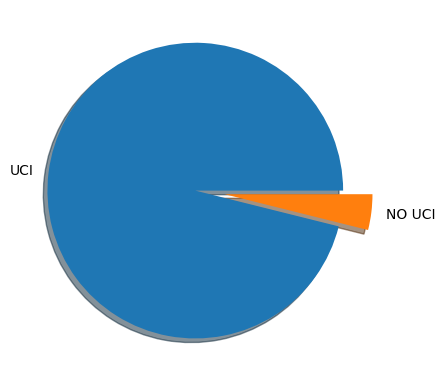

In [271]:
# seeing the distribution of classes, this will help us to identify which types 

len_live = len(df['flag_uci'][df.flag_uci == 0])
len_death = len(df['flag_uci'][df.flag_uci == 1])

arr = np.array([len_live , len_death]) 
labels = ['UCI', 'NO UCI'] 
print("Total No. Of Living Cases :- ", len_live)
print("Total No. Of Died Cases :- ", len_death)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show() 


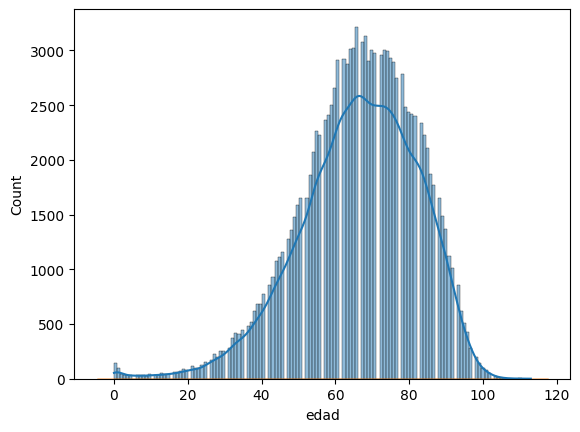

In [272]:
# seeing the distribution of Age  
sns.histplot(df["edad"], kde = True) 
sns.kdeplot(df["edad"], fill=True)
plt.show()
plt.show() 

<Axes: >

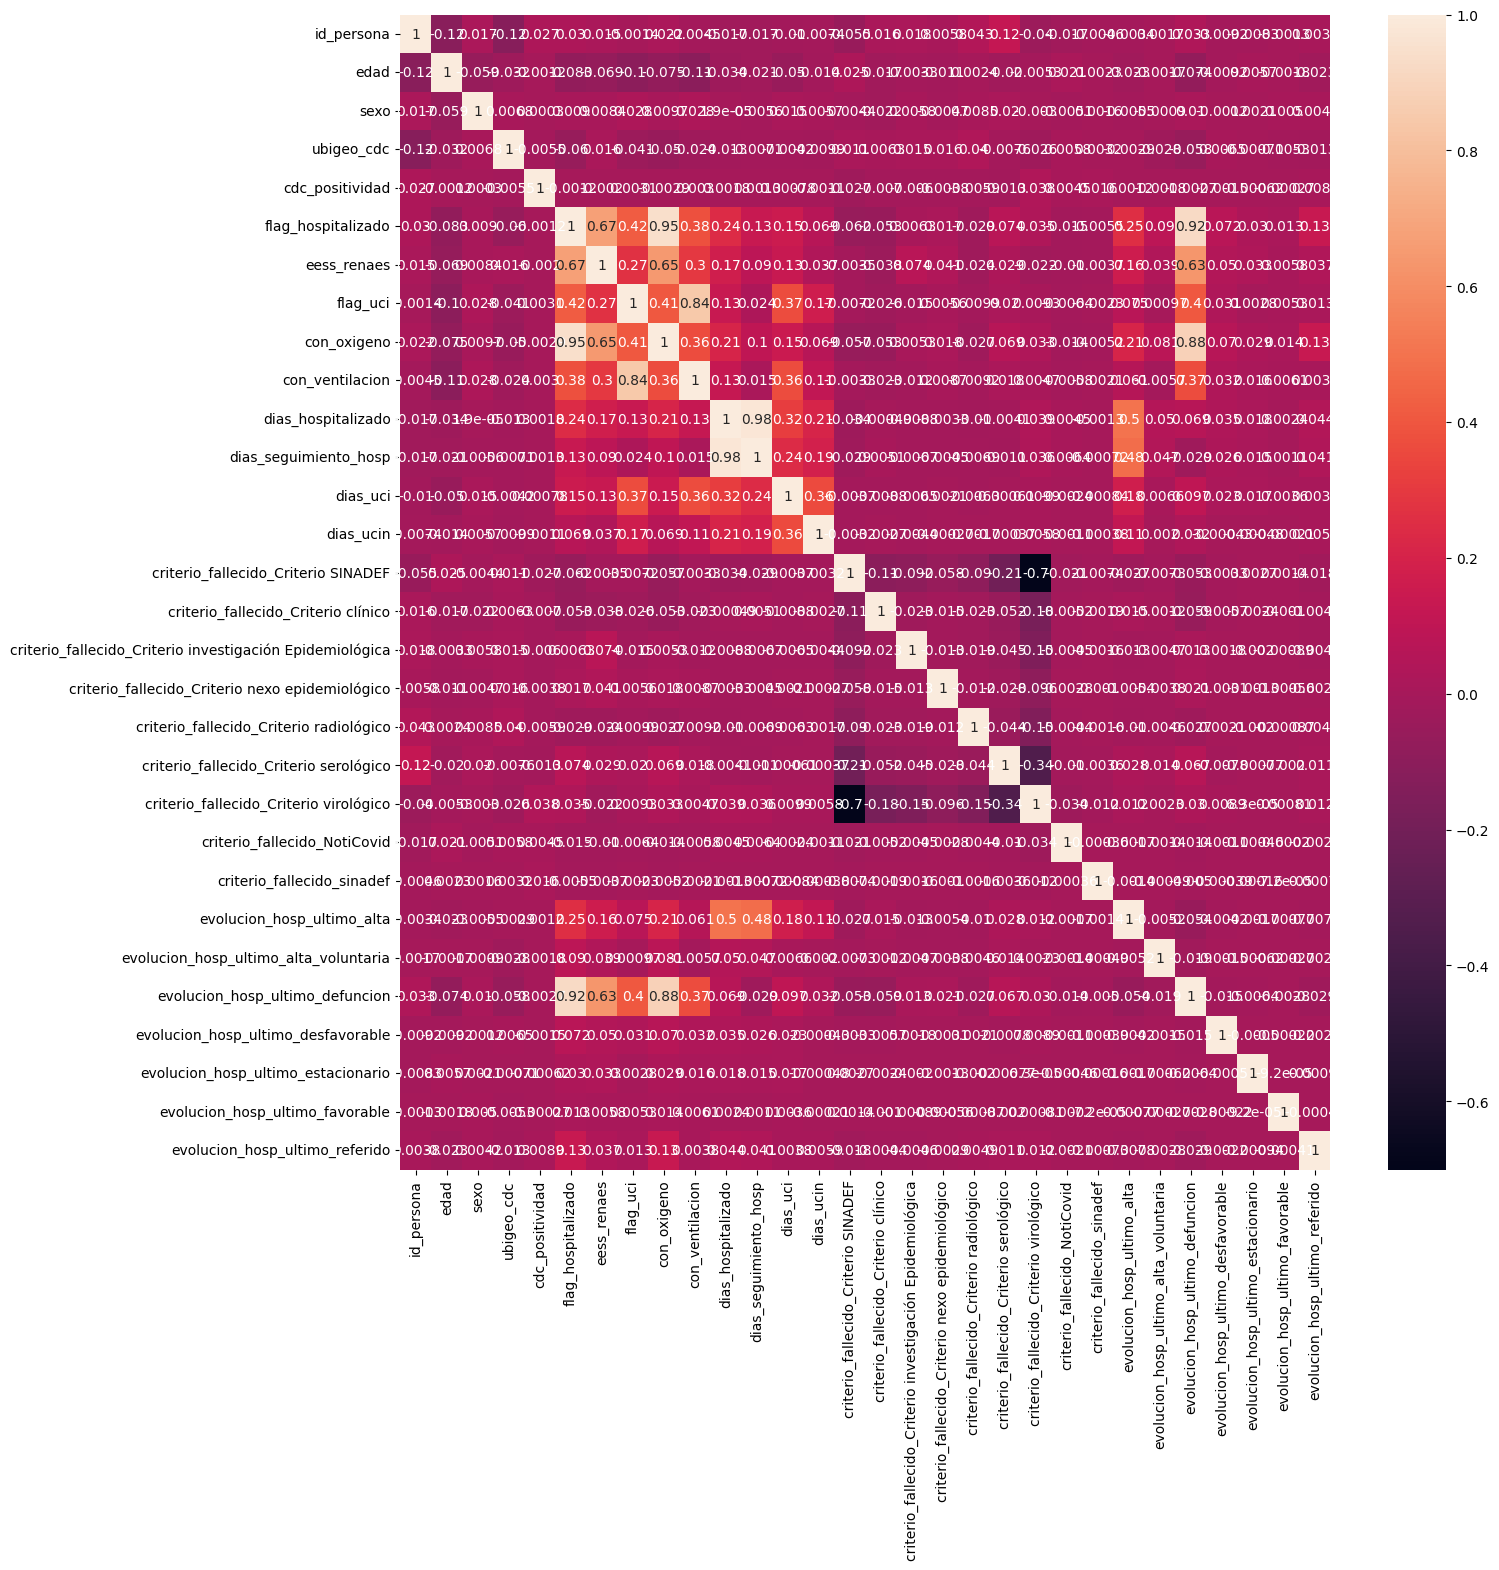

In [273]:
# checking the Correlation of our variables  

corr = df.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True) 

In [274]:
from sklearn.model_selection import train_test_split 

X = df.drop("flag_uci", axis=1) 
y = df["flag_uci"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [275]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(87099, 29)
(37329, 29)
(87099,)
(37329,)


In [276]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

In [277]:
predictions = lr.predict(X_test)  

print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  0
Model Predicted Value:-  1.4554035384793726


In [278]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.10113169211115529


In [279]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [280]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35911
           1       0.98      0.98      0.98      1418

    accuracy                           1.00     37329
   macro avg       0.99      0.99      0.99     37329
weighted avg       1.00      1.00      1.00     37329

AUC ROC :  0.9882848794930611


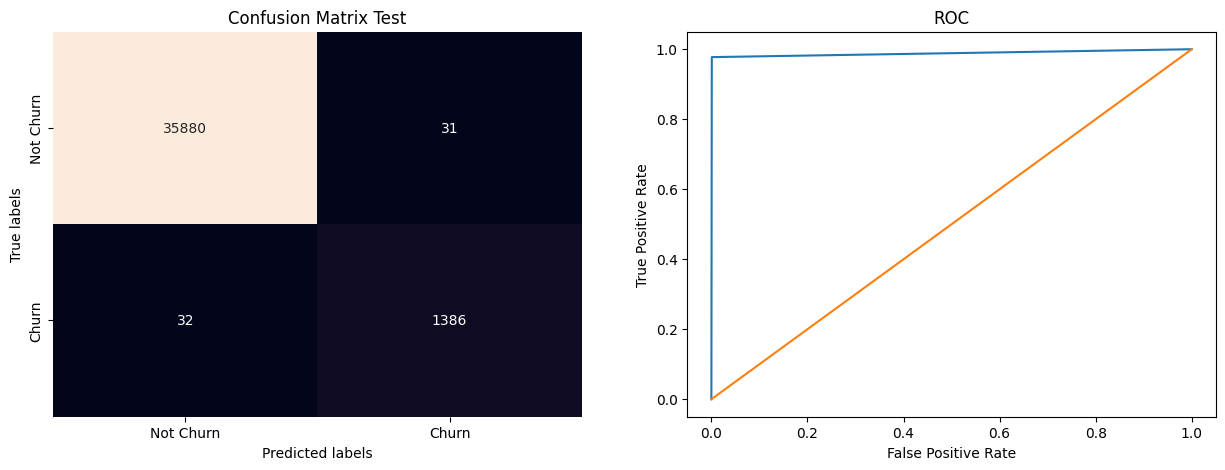

In [281]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

c:\Users\kainak0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     35911
           1       0.47      0.08      0.14      1418

    accuracy                           0.96     37329
   macro avg       0.72      0.54      0.56     37329
weighted avg       0.95      0.96      0.95     37329

AUC ROC :  0.5401226307837755


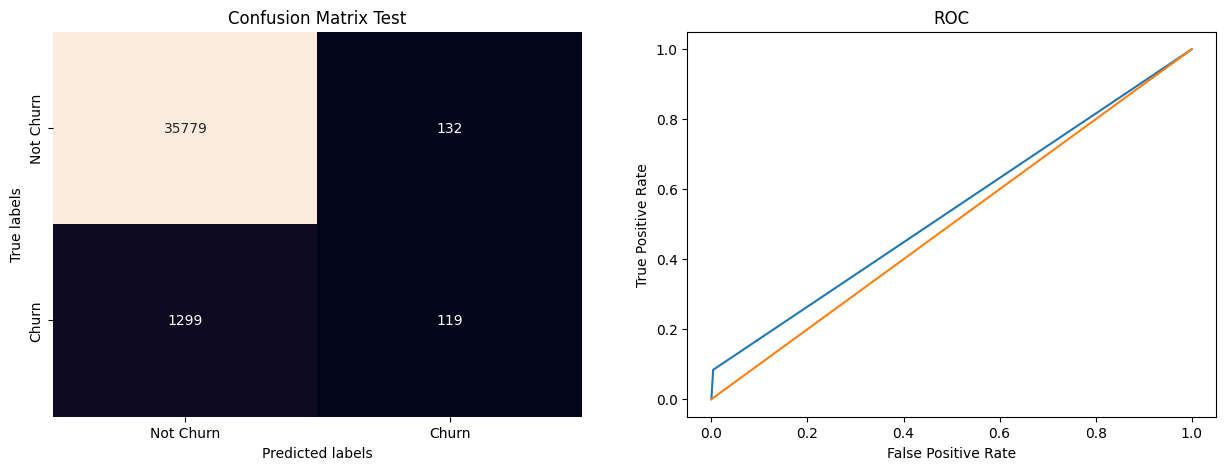

In [282]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35911
           1       1.00      0.97      0.98      1418

    accuracy                           1.00     37329
   macro avg       1.00      0.99      0.99     37329
weighted avg       1.00      1.00      1.00     37329

AUC ROC :  0.9855012484044653


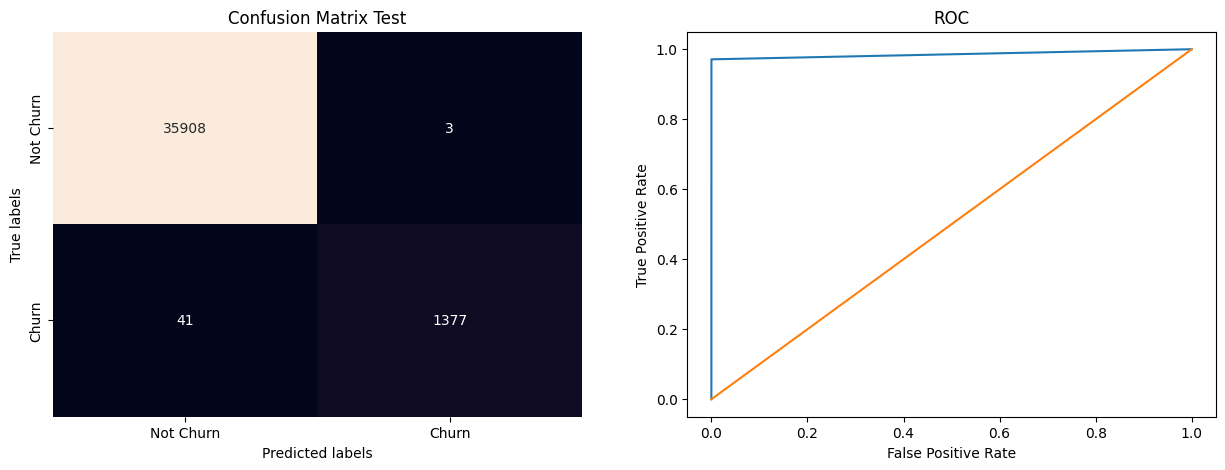

In [283]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35911
           1       1.00      0.97      0.98      1418

    accuracy                           1.00     37329
   macro avg       1.00      0.99      0.99     37329
weighted avg       1.00      1.00      1.00     37329

AUC ROC :  0.9861646970910178


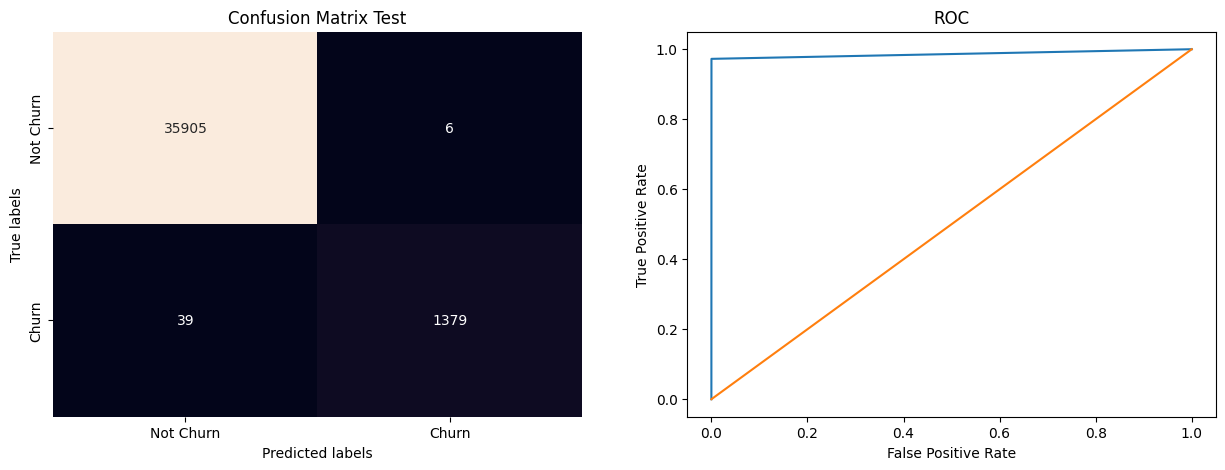

In [284]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

In [285]:
from sklearn.utils import resample

upsample_data = df.copy() # Generar una copia de nuestra data original

majority = upsample_data[upsample_data["flag_uci"]==0] # Muestra categoria No churn
minority = upsample_data[upsample_data["flag_uci"]==1] # Muestra categoria Churn 27%

In [286]:
majority.shape, minority.shape

((119583, 30), (4845, 30))

In [287]:
minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=1) # Sobremuestreo

In [288]:
minority_upsampled.shape

(5163, 30)

In [289]:
del(upsample_data) # elimina
upsample_data = pd.concat([majority,minority_upsampled])

In [290]:
upsample_data.shape

(124746, 30)

In [291]:
upsample_data["flag_uci"].value_counts()

flag_uci
0    119583
1      5163
Name: count, dtype: int64

In [292]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124746 entries, 0 to 20349
Data columns (total 30 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   id_persona                                                124746 non-null  int64  
 1   edad                                                      124746 non-null  int64  
 2   sexo                                                      124746 non-null  int64  
 3   ubigeo_cdc                                                124746 non-null  int64  
 4   cdc_positividad                                           124746 non-null  int64  
 5   flag_hospitalizado                                        124746 non-null  int64  
 6   eess_renaes                                               124746 non-null  int64  
 7   flag_uci                                                  124746 non-null  int64  
 8   con_oxigen

In [293]:
id_customer_upsample = upsample_data["id_persona"]
label_upsample = upsample_data["flag_uci"]
upsample_data.drop("flag_uci",inplace = True, axis = 1)
upsample_data.drop("id_persona",inplace = True, axis = 1)

In [294]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35897
           1       0.99      0.99      0.99      1527

    accuracy                           1.00     37424
   macro avg       0.99      1.00      0.99     37424
weighted avg       1.00      1.00      1.00     37424

AUC ROC :  0.9951372732568419


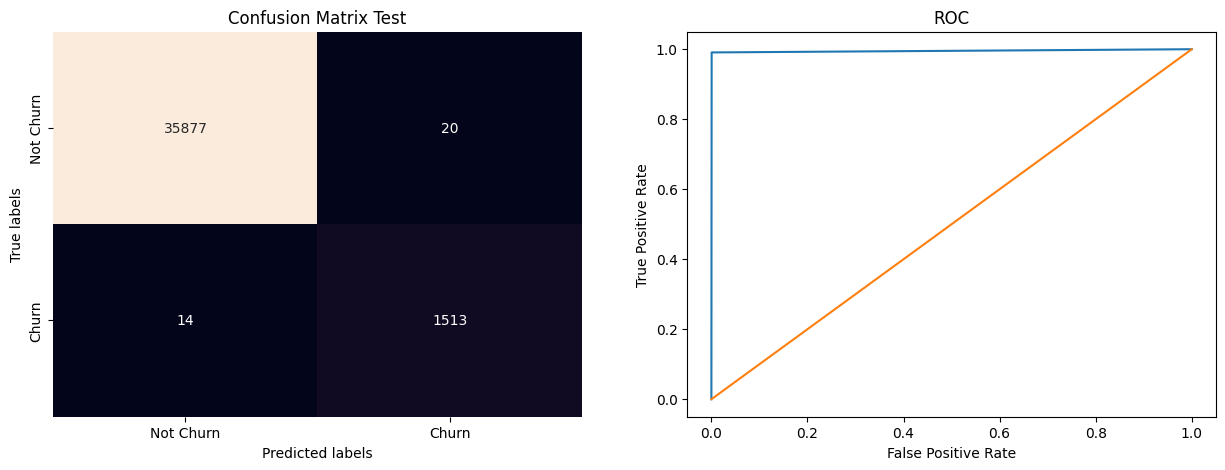

In [295]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

c:\Users\kainak0\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35897
           1       0.90      0.66      0.76      1527

    accuracy                           0.98     37424
   macro avg       0.94      0.83      0.88     37424
weighted avg       0.98      0.98      0.98     37424

AUC ROC :  0.8307631386379999


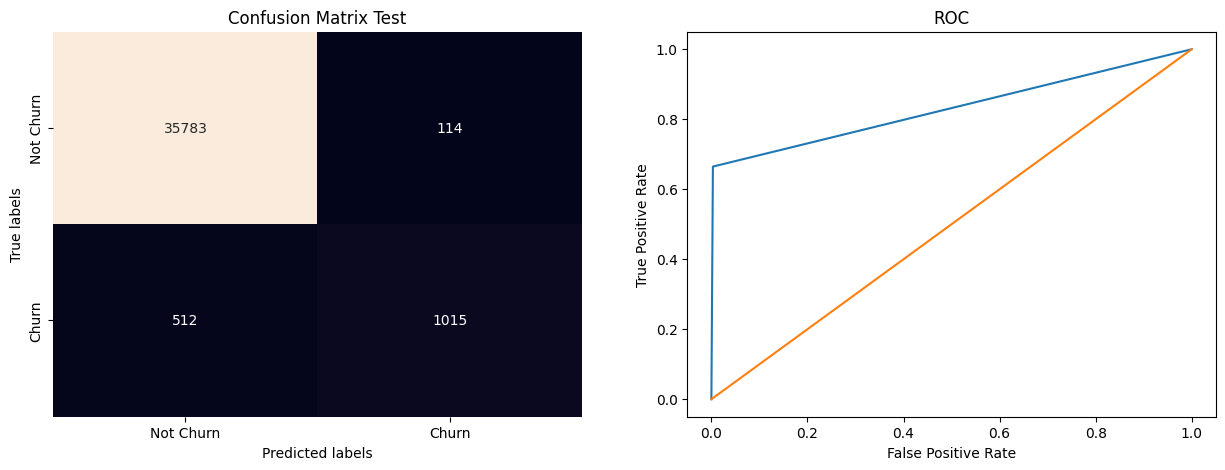

In [296]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35897
           1       1.00      0.98      0.99      1527

    accuracy                           1.00     37424
   macro avg       1.00      0.99      1.00     37424
weighted avg       1.00      1.00      1.00     37424

AUC ROC :  0.992427107033058


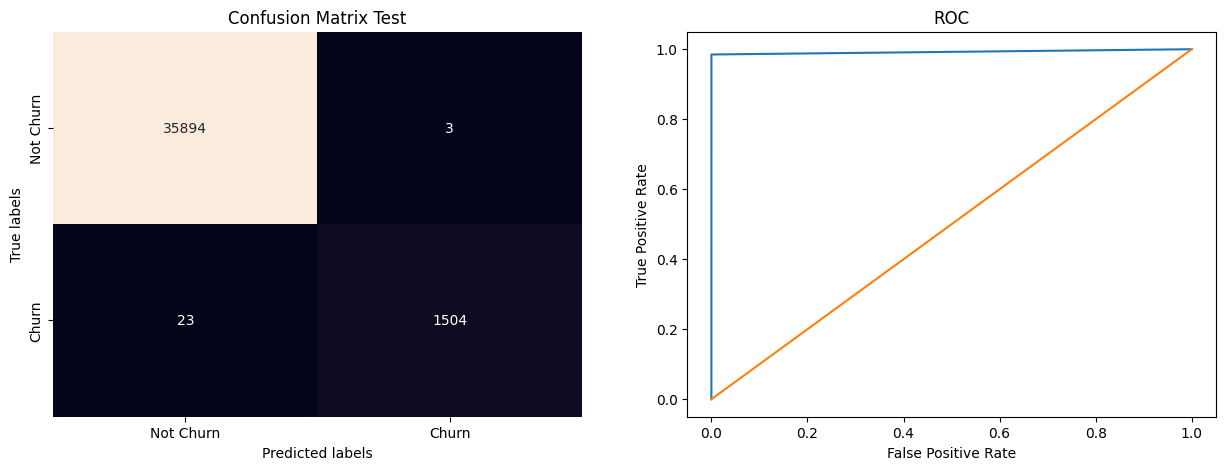

In [297]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35897
           1       1.00      0.99      0.99      1527

    accuracy                           1.00     37424
   macro avg       1.00      0.99      1.00     37424
weighted avg       1.00      1.00      1.00     37424

AUC ROC :  0.9930959146210345


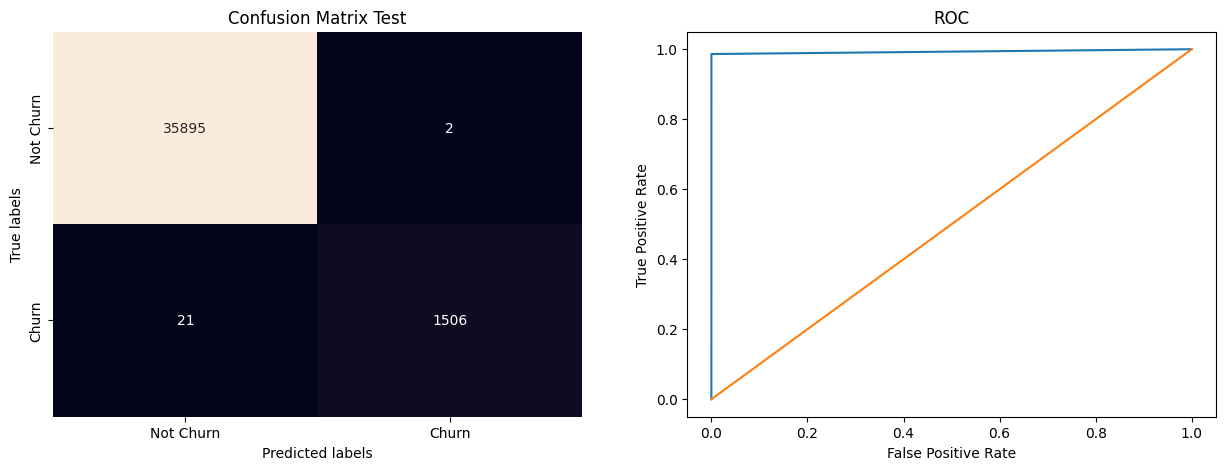

In [298]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

In [299]:
import shap

c:\Users\kainak0\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [300]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test_upS)

In [301]:
shap.summary_plot(shap_values[0], X_test_upS)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.